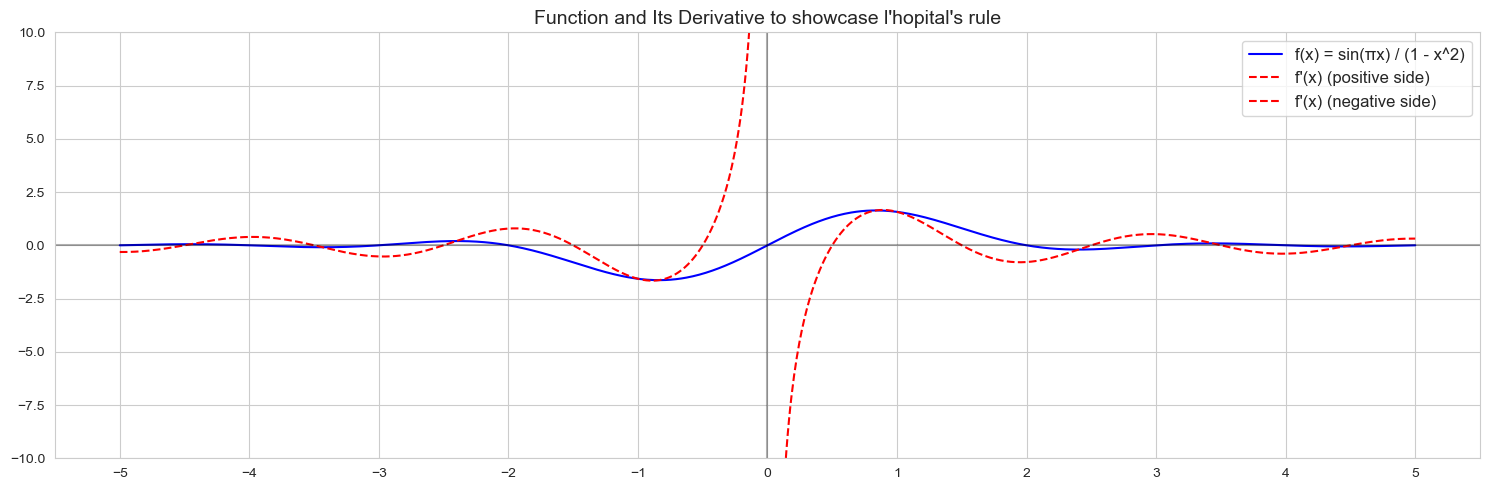

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def derive_plot():
    # Create a figure with a single subplot
    fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))
    
    # Define x values
    x1 = np.linspace(-5, 5, 1000)
    
    # Define the functions and their derivatives
    y1 = np.sin(np.pi * x1)
    dy1 = np.pi * np.cos(np.pi * x1)
    
    y2 = 1 - x1**2
    dy2 = -2 * x1
    
    # Handle division by zero and discontinuities using masking
    with np.errstate(divide='ignore', invalid='ignore'):
        f = np.divide(y1, y2)
        f_prime = np.divide(dy1, dy2)
    
    # Mask values where |y2| < a small epsilon to avoid plotting near discontinuities
    epsilon = 1e-5
    mask_discontinuity = np.abs(y2) < epsilon
    f_prime = np.ma.masked_where(mask_discontinuity, f_prime)
    
    # Split x1 and f_prime into positive and negative parts
    mask_positive = x1 > 0
    mask_negative = x1 < 0
    
    x_positive = x1[mask_positive]
    f_prime_positive = f_prime[mask_positive]
    
    x_negative = x1[mask_negative]
    f_prime_negative = f_prime[mask_negative]
    
    # Plot the function f(x) in a single call
    ax1.plot(x1, f, label='f(x) = sin(πx) / (1 - x^2)', color='b')
    
    # Plot the derivative f'(x) separately for positive and negative sides
    ax1.plot(x_positive, f_prime_positive, '--', label="f'(x) (positive side)", color='r')
    ax1.plot(x_negative, f_prime_negative, '--', label="f'(x) (negative side)", color='r')
    
    # Set plot title, grid, and legend
    ax1.set_title('Function and Its Derivative to showcase l\'hopital\'s rule', fontsize=14)
    ax1.grid(True)
    ax1.legend(fontsize=12)
    
    # Add horizontal and vertical reference lines
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3, )
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Set vertical bounds for better visualization
    ax1.set_ylim(-10, 10)
    
    # Set x-axis labels at every integer from -5 to 5
    ax1.set_xticks(np.arange(-5, 6, 1))
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    derive_plot()
